 DME DETECTION

In [43]:
import os
import numpy as np
import cv2 # OpenCV
from sklearn.svm import SVC # SVM klasifikator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
import matplotlib.pyplot as plt
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io
import random
from scipy import ndarray
%matplotlib inline

In [44]:
def load_image(path):
    return cv2.imread(path)

def display_image(image):
    plt.imshow(image, 'gray')
    
def image_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def image_bin(image_gs):
    height, width = image_gs.shape[0:2]
    image_binary = np.ndarray((height, width), dtype=np.uint8)
    ret,image_bin = cv2.threshold(image_gs, 127, 255, cv2.THRESH_BINARY)
    return image_bin

def invert(image):
    return 255-image

In [58]:
train_dir_dme = 'images/TRAIN/DME'
train_dir_normal = 'images/TRAIN/NORMAL'

nor_imgs = []
dme_imgs = []

folder_path = 'images/edited'

for img_name in os.listdir(train_dir_normal):
    img_path = os.path.join(train_dir_normal, img_name)
    if 'NORMAL' in img_name:
        img = load_image(img_path)
        if img.shape[1] != 512:
            img=img[:,128:640]
        img2 = (image_bin(image_gray(img)))
        proba, contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        visina = y + h/2
        if (visina > 0 and visina < 60) or (visina > 400 and visina < 496) :
            #cv2.drawContours(proba,[c],0,(255,0,0),7)
            cv2.fillPoly(img, pts =[c], color=(0,0,0))
        nor_imgs.append(img)
        new_file_path = '%s/%s.jpeg' %(folder_path, img_name[:-5])
        io.imsave(new_file_path, img)
    
for img_name in os.listdir(train_dir_dme):
    img_path = os.path.join(train_dir_dme, img_name)
    img = load_image(img_path)
    if 'DME' in img_name:
        img = load_image(img_path)
        if img.shape[1] != 512:
            img=img[:,128:640]
        img2 = (image_bin(image_gray(img)))
        proba2, contours, hierarchy = cv2.findContours(img2.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = max(contours, key = cv2.contourArea)
        x, y, w, h = cv2.boundingRect(c)
        visina = y + h/2
        if (visina > 0 and visina < 100) or (visina > 350 and visina < 496) :
            #cv2.drawContours(proba,[c],0,(255,0,0),7)
            cv2.fillPoly(img, pts =[c], color=(0,0,0))
        dme_imgs.append(img)
        new_file_path = '%s/%s.jpeg' %(folder_path, img_name[:-5])
        io.imsave(new_file_path, img)
   
        
print("Normal images #: ", len(nor_imgs))
print("DME images #: ", len(dme_imgs))

Normal images #:  242
DME images #:  242


In [67]:
def random_rotation(img):
    random_degree = random.uniform(10, 180)
    return sk.transform.rotate(img, random_degree)

def increase_brightness(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    value = random.randint(0, 100)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [68]:
edited_dir = 'images/edited'
augmented_dir = 'images/augmented'

augmented_imgs = []

num_normal = 0
num_dme = 0

for img_name in os.listdir(edited_dir):
    img_path = os.path.join(edited_dir, img_name)
    img = load_image(img_path)
    
    if 'DME' in img_name:
        num_dme += 1
        augmented_imgs.append(img)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, img)
    
        num_dme += 1
        augmented_imgs.append(img)
        rot_image = random_rotation(img)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, rot_image)
        
        num_dme += 1
        augmented_imgs.append(img)
        bri_image = increase_brightness(img)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, bri_image)
        
        num_dme += 1
        augmented_imgs.append(img)
        bri_image = increase_brightness(img)
        bri_rot_image = random_rotation(bri_image)
        new_file_path = '%s/DME_%s.jpeg' %(augmented_dir, num_dme)
        io.imsave(new_file_path, bri_rot_image)
        
    else :
        num_normal += 1
        augmented_imgs.append(img)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, img)
    
        num_normal += 1
        augmented_imgs.append(img)
        rot_image = random_rotation(img)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, rot_image)
        
        num_normal += 1
        augmented_imgs.append(img)
        bri_image = increase_brightness(img)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, bri_image)
        
        num_normal += 1
        augmented_imgs.append(img)
        bri_image = increase_brightness(img)
        bri_rot_image = random_rotation(bri_image)
        new_file_path = '%s/NORMAL_%s.jpeg' %(augmented_dir, num_normal)
        io.imsave(new_file_path, bri_rot_image)
        
print("Augmented images #: ", len(augmented_imgs))

C:\Users\Makaric\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Augmented images #:  1936


random_degree:  72.17681288341205


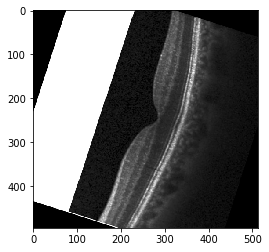

In [66]:
proba = load_image('images/TRAIN/NORMAL/NORMAL-351109-1.jpeg')
random_num = random.randint(20, 100)
#print('random_num: ', random_num)
#display_image(increase_brightness(proba, random_num))
random_degree = random.uniform(10, 180)
print('random_degree: ', random_degree)
display_image(sk.transform.rotate(proba, random_degree))
#display_image(proba)

0 0 512 496
248.0


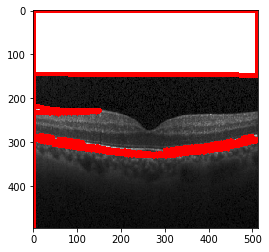

In [42]:
proba = load_image('images/TRAIN/NORMAL/NORMAL-351109-1.jpeg')
#display_image(proba)
#print(proba.shape[1])
#print(proba[0:40, :])
if proba.shape[1] != 512:
    proba = proba[:,128:640]

img = (image_bin(image_gray(proba)))
proba2, contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
c = max(contours, key = cv2.contourArea)

x,y,w,h = cv2.boundingRect(c) #koordinate i velicina granicnog pravougaonika
print(x, y, w, h)
visina = y + h/2
print(visina)
#if (visina > 0 and visina < 60) or (visina > 400 and visina < 496) :
#cv2.fillPoly(proba, pts =[c], color=(0,0,0))
cv2.drawContours(proba,[c],0,(255,0,0),10)
display_image(proba)
#new_file_path = 'images/TRAIN/DME/DME-5912153-1.jpeg'
#io.imsave(new_file_path, proba)